In [1]:
from chaotic_inventory_opt.fractal.hurst import HurstEstimator
from chaotic_inventory_opt.fractal.wavelets import WaveletEnergyAnalyzer
from chaotic_inventory_opt.chaos.lyapunov import LyapunovExponentEstimator

import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
import os
import numpy as np

def load_m5_demand(item_id, store_id):
    sales = pd.read_csv("sales_train_validation.csv")

    row = sales[
        (sales["item_id"] == item_id) &
        (sales["store_id"] == store_id)
    ]

    d_cols = [c for c in row.columns if c.startswith("d_")]
    return row[d_cols].values.flatten().astype(float)


In [3]:
demand = load_m5_demand("FOODS_3_090", "CA_1")

In [4]:
hurst = HurstEstimator(min_lag=2, max_lag=30)
H = hurst.estimate(demand)
print("Hurst exponent:", H)

Hurst exponent: 0.08397892274687725


In [5]:
wave = WaveletEnergyAnalyzer()
energy = wave.energy_by_scale(demand)
print("Energy by scale:", energy)

Energy by scale: {'scale_1': 0.21108684621518595, 'scale_2': 0.05071789854091473, 'scale_3': 0.1382579252709306, 'scale_4': 0.06343981246676104, 'scale_5': 0.09511881341930631, 'scale_6': 0.13169395665087574, 'scale_7': 0.16526013330393075, 'scale_8': 0.1444246141320949}


In [6]:
lyap = LyapunovExponentEstimator().estimate(demand)
print("Lyapunov exponent:", lyap)

Lyapunov exponent: -2.1738850446025197


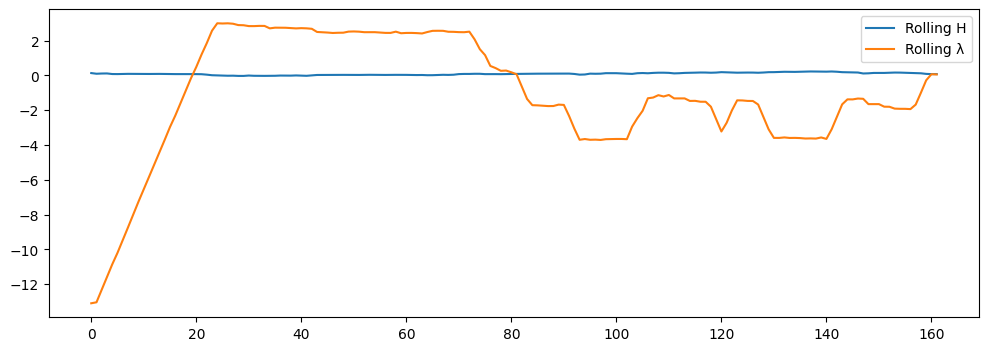

In [7]:

window = 300
H_vals, lyap_vals = [], []

for i in range(window, len(demand), 10):
    H_vals.append(hurst.estimate(demand[i-window:i]))
    lyap_vals.append(LyapunovExponentEstimator().estimate(demand[i-window:i]))

plt.figure(figsize=(12,4))
plt.plot(H_vals, label="Rolling H")
plt.plot(lyap_vals, label="Rolling λ")
plt.legend()
plt.show()
